Dữ liệu y ban đầu  0
Dữ liệu y sau one-hot encoding  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 5840 samples, validate on 1460 samples
Epoch 1/70
5840/5840 [==============================] - 13s 2ms/step - loss: 1.3673 - acc: 0.6265 - val_loss: 0.2621 - val_acc: 0.9767
Epoch 2/70
5840/5840 [==============================] - 13s 2ms/step - loss: 0.1615 - acc: 0.9759 - val_loss: 0.0739 - val_acc: 0.9918
Epoch 3/70
5840/5840 [==============================] - 11s 2ms/step - loss: 0.0693 - acc: 0.9892 - val_loss: 0.0464 - val_acc: 0.9938
Epoch 4/70
5840/5840 [==============================] - 11s 2ms/step - loss: 0.0440 - acc: 0.9932 - val_loss: 0.0376 - val_acc: 0.9938
Epoch 5/70
5840/5840 [==============================] - 11s 2ms/step - loss: 0.0300 - acc: 0.9957 - val_loss: 0.0271 - val_acc: 0.9945
Epoch 6/70
5840/5840 [==============================] - 10s 2ms/step - l

5840/5840 [==============================] - 11s 2ms/step - loss: 1.7208e-05 - acc: 1.0000 - val_loss: 0.0056 - val_acc: 0.9973
Epoch 56/70
5840/5840 [==============================] - 10s 2ms/step - loss: 1.5566e-05 - acc: 1.0000 - val_loss: 0.0068 - val_acc: 0.9973- ETA: 0s - loss: 1.6130e-05 -
Epoch 57/70
5840/5840 [==============================] - 10s 2ms/step - loss: 1.4054e-05 - acc: 1.0000 - val_loss: 0.0060 - val_acc: 0.9966
Epoch 58/70
5840/5840 [==============================] - 10s 2ms/step - loss: 1.2649e-05 - acc: 1.0000 - val_loss: 0.0065 - val_acc: 0.9973
Epoch 59/70
5840/5840 [==============================] - 11s 2ms/step - loss: 1.1445e-05 - acc: 1.0000 - val_loss: 0.0060 - val_acc: 0.9973
Epoch 60/70
5840/5840 [==============================] - 11s 2ms/step - loss: 1.0273e-05 - acc: 1.0000 - val_loss: 0.0066 - val_acc: 0.9973
Epoch 61/70
5840/5840 [==============================] - 10s 2ms/step - loss: 9.4665e-06 - acc: 1.0000 - val_loss: 0.0060 - val_acc: 0.9973
Ep

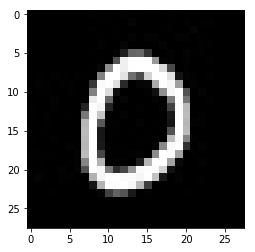

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pathlib
import os
import random

homePath = 'C:/Users/admin/Downloads/Project II/data/'
IMG_SIZE = 28
NUMBER_CLASS = 10
chars = [chr(i) for i in range(48,58)]
NUM_TRAIN = 7300
# ham xu li du lieu
def preprocessdata():
    data = []
    label = []
    global chars
    for i,char in enumerate(chars):
        imgPath = homePath + char + '/'
        imgFiles = os.listdir(imgPath)
        for image in imgFiles:
            img = cv2.imread(imgPath+ image,0)
            data.append(img)
            label.append(i)
    l = len(label)
    shutfle = list(range(l))
    random.shuffle(shutfle)
    
    data = np.array(data)
    label = np.array(label)
    data = data[shutfle]
    label = label[shutfle]
    
    return data,label

data,label = preprocessdata()

train_x = data[:NUM_TRAIN]
train_y = label[:NUM_TRAIN]

test_x = data[NUM_TRAIN:]
test_y = label[NUM_TRAIN:]

#(train_x, test_x, train_Y, test_Y) = train_test_split(data,
#    labels, test_size=0.2, random_state=42)
train_x = np.reshape(train_x,(-1,28,28,1))
train_Y = np_utils.to_categorical(train_y, 10)
#valid_x = np.reshape(train_x,(-1,28,28,1))
#valid_Y = np_utils.to_categorical(train_y, 10)
test_x = np.reshape(train_x,(-1,28,28,1))
test_Y = np_utils.to_categorical(train_y, 10)

print('Dữ liệu y ban đầu ',train_y[0])
print('Dữ liệu y sau one-hot encoding ',train_Y[0])
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])
H = model.fit(train_x, train_Y, validation_split=0.2,shuffle=True,
                 batch_size=32, epochs=70, verbose=1)
score = model.evaluate(test_x, test_Y, verbose=0)
print(score)
plt.imshow(test_x[0].reshape(28,28), cmap='gray')
y_predict = model.predict(test_x[0].reshape(1,28,28,1))
score = model.evaluate(test_x, test_Y, verbose=0)
print('Giá trị dự đoán: ', np.argmax(y_predict))
model.save_weights("C:/Users/admin/Downloads/Project II/modelx2.h5")
print("Saved model to drive")

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pathlib
import os
import random

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])
model.load_weights("C:/Users/admin/Downloads/Project II/modelx2.h5")

image = cv2.imread("C:/Users/admin/Downloads/Project II/data/test/test.jpg")
image = cv2.resize(image,(800,600))
im_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
im_blur = cv2.GaussianBlur(im_gray,(5,5),0)
thre = cv2.adaptiveThreshold(im_blur,maxValue=255,adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,thresholdType=cv2.THRESH_BINARY_INV,blockSize=29,C=9)
_,contours,hierachy = cv2.findContours(thre,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
rects = [cv2.boundingRect(cnt) for cnt in contours]

for i in contours:
    results= [chr(char) for char in range(48, 58)]
    minsize = 10
    (x, y, w, h) = cv2.boundingRect(i)
    if w > minsize and h > minsize:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = thre[y:y + h, x:x + w]
        roi = np.pad(roi, (20, 20), 'constant', constant_values=(0, 0))
        roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
        roi = cv2.dilate(roi, (3, 3))
        test_x = np.array([roi])
        number = model.predict(test_x.reshape(-1,28,28,1))
        numbers = np.argmax(number,axis=-1)
        res = results[int(numbers)]
        #print(res)
        cv2.putText(image, str(res), (x, y),cv2.FONT_HERSHEY_DUPLEX, 3, (255, 255, 0), 3)
cv2.imwrite('C:/Users/admin/Downloads/Project II/data/result6.jpg', image)
print("Save anh vao thu muc")

Save anh vao thu muc
